In [1]:
!pip install git+https://github.com/rtqichen/torchdiffeq.git
project_dir = "odenet"
import sys
if True: # On colab
    from google.colab import drive
    drive.mount('/content/drive',force_remount=True)
    root = "/content/drive/My Drive/Colab Notebooks/"+project_dir
    sys.path.append(root)
else: # Local
    root = './'

  Cloning https://github.com/rtqichen/torchdiffeq.git to /tmp/pip-req-build-3g690h7j
  Running command git clone -q https://github.com/rtqichen/torchdiffeq.git /tmp/pip-req-build-3g690h7j
  Created wheel for torchdiffeq: filename=torchdiffeq-0.0.1-cp36-none-any.whl size=25885 sha256=9e8ab3dee4ea83a917b9f96fa2b41ce5fcadf59e38db71ad4904e0fe26f59b7a
  Stored in directory: /tmp/pip-ephem-wheel-cache-lcwptf5t/wheels/f1/89/ce/78b4c1aabbb8dad56a2dbd776f9ffcbeca103b2ddae40d094b
Successfully built torchdiffeq
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization c

In [2]:
import torch
from matplotlib import pylab as plt
from odenet import datasets
from odenet.odenet_cifar10 import ODEResNet
from odenet import refine_train

import importlib
importlib.reload(refine_train)
#importlib.reload(odenet_cifar10)

<module 'odenet.refine_train' from '/content/drive/My Drive/Colab Notebooks/odenet/odenet/refine_train.py'>

In [3]:
refset,trainset,trainloader,testset,testloader \
    = datasets.get_dataset('CIFAR10')

0it [00:00, ?it/s]

170500096it [00:06, 27626095.05it/s]                               


Extracting ./CIFAR10_data/cifar-10-python.tar.gz to ./CIFAR10_data
Files already downloaded and verified
Files already downloaded and verified


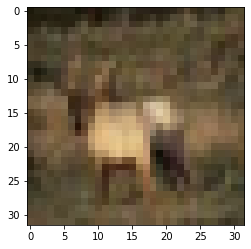

In [ ]:
plt.imshow(refset.data[3])

Starting with  100666 with lr =  0.001
Adapting to  197658 with lr =  0.0001
Adapting to  391642 with lr =  0.0001


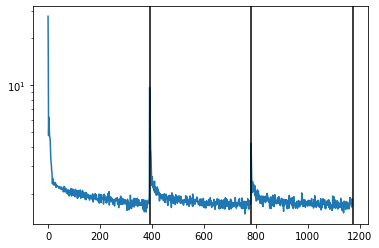

In [ ]:
model_euler = ODEResNet(method='euler')
RES_euler = refine_train.train_adapt(model_euler, trainloader, torch.nn.CrossEntropyLoss(),
                                     1, 3, learning_rate=1.0e-3)
plt.semilogy(RES_euler[1])
for r in RES_euler[2]:
    plt.axvline(r,color='k')

Starting with  100666 with lr =  0.001
Adapting to  197658 with lr =  0.0001
Adapting to  391642 with lr =  0.0001


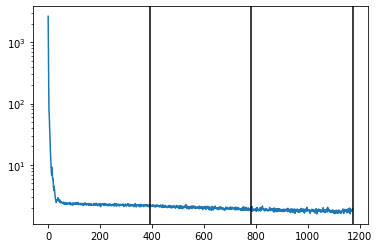

In [4]:
model_rk4 = ODEResNet(method='rk4')
RES_rk4 = \
    refine_train.train_adapt(model_rk4, trainloader, torch.nn.CrossEntropyLoss(),
                             1, 3, learning_rate=1.0e-3)
plt.semilogy(RES_rk4[1])
for r in RES_rk4[2]:
    plt.axvline(r,color='k')

(1.1043699407438317, 6)

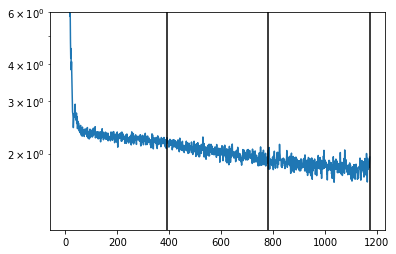

In [7]:
plt.semilogy(RES_rk4[1])
for r in RES_rk4[2]:
    plt.axvline(r,color='k')
plt.ylim(top=6)

In [ ]:
def acc(y,labels):
    return torch.sum(torch.argmax(y,dim=-1) == labels)*1.0/len(labels)
def plot_accuracy(model):
    imgs,labels = next(iter(testloader))
    y = model(imgs)
    print(acc(y,labels).item())
    bars = torch.nn.Softmax(dim=-1)(y[:10])
    size = len(bars)
    plt.figure(figsize=(10,10))
    for i,(pred,img,label) in enumerate(zip(bars,imgs,labels)):
        plt.subplot(size//2+1,4,1+2*i)
        plt.imshow(img[0,:,:].detach().numpy(),cmap='Greys')
        plt.subplot(size//2+1,4,2+2*i)
        plt.bar(range(10),[1 if y==label else 0 for y in range(10)])
        plt.bar(range(10),pred.detach().numpy())
    plt.show()

0.1875


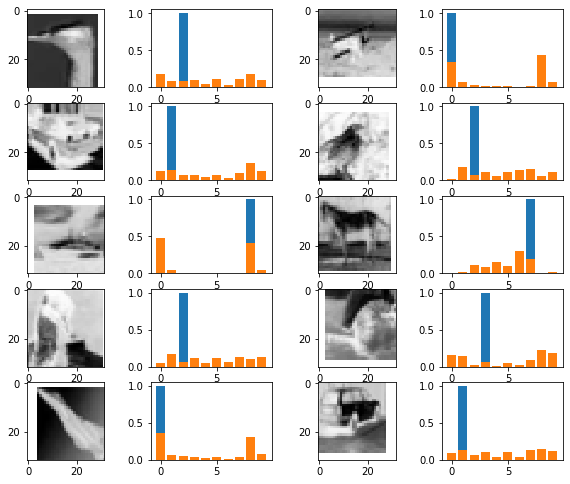

In [ ]:
plot_accuracy(model_list[-1])

In [ ]:
refset.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']